## Assignment 7

**Group No - 19**

**Team Member:**

Yash Jain - 001521876

Xinwei Cao - 001566973

Data comes from the yahoo finance and company name is Dell. The data sample is from Jan 2018 to March 2021 

In [1]:
# Data importing
import pandas_datareader as web
import datetime
start, end = datetime.datetime(2018, 1 , 1), datetime.datetime(2021, 3, 1)
dell = web.DataReader('Dell', 'yahoo', start, end)

Removing columns that are not needed and also filling data in if any is missing in any columns.

In [2]:
# Data Cleansing
drop_cols = ['Volume', 'Adj Close']
dell.drop(drop_cols, axis=1, inplace=True)

for i in dell:
    dell.fillna(value={i: dell[i].mean()}, inplace=True)

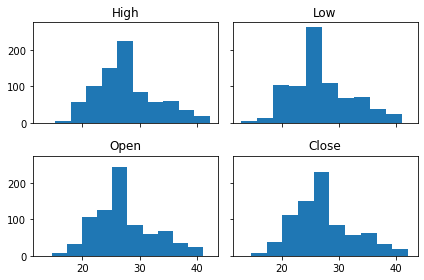

In [3]:
# Data exploration
import matplotlib.pyplot as plt
_ = dell.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

The first step is reconizing what sort of distribution to fit the data. 

**Observations:**
+ The data is continuous
+ First up and then down
+ The data is symmetrical distribution

By going through all the theoretical pdfs like (normal, Poisson,Gamma etc.), a good option appears to be the normal distribution: The curves look like inverted u-shaped and waiting times between events are relevant.

$$f(x) = \frac{\beta^\alpha x^{\alpha -1} e^{- \beta x}}{\Gamma (\alpha)}$$

where, 
+ $\Gamma (\alpha)$ is the gamma function. For all positive integers, $\Gamma (\alpha)$ = $\Gamma (\alpha - 1)$!
+ $\alpha, \beta > 0$
+ $x > 0$

Calculating mean, variance, alpha, and beta

In [4]:
dell_mean, dell_var = dell.mean(), dell.var()

In [5]:
alpha_mom, beta_mom = dell_mean ** 2 / dell_var, dell_var / dell_mean

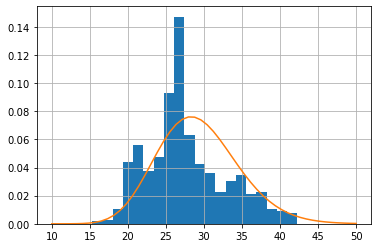

In [6]:
import numpy as np
%matplotlib inline
from scipy.stats.distributions import gamma

dell.High.hist(density=True, bins=20)
x = np.linspace(10, 50)
plt.plot(x, gamma.pdf(x, alpha_mom[0], beta_mom[0]))

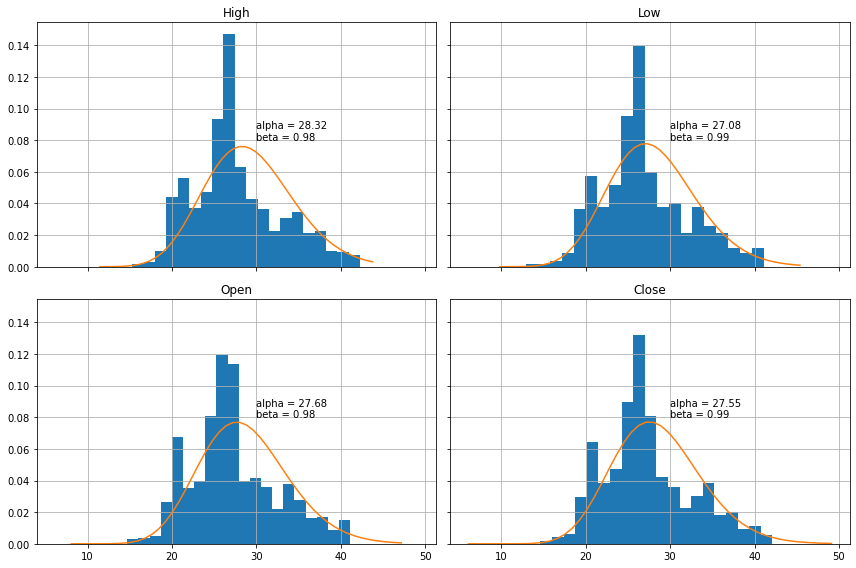

In [7]:
axs = dell.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=20, grid=True)

for ax in axs.ravel():

    # Get header
    m = ax.get_title()

    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(30, 0.08))
plt.tight_layout()